In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [180]:
class Cartesian_Orbit():
    '''
    This class simulates the orbital dynamics of two bodies. It utilizes the Lagrange's equations
    on gravitational attraction in cartesian coordinate representation.
    ----------
    Parameters
    -----------
    m1: float
    m2: float
    G: float
    ---------
    df/dt(t,f):
    Returns the right side of the differential equation in f, with respect to time t
    '''
    def __init__(self,m1=1.,m2=1.,G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def df_dt(self,t,f):
        """
        This returns the right side of df/dt
        
        [df/dt d^2f/dt^2]
        
        t: float
        f: a 8 component vector storing information on the position and speed of both particles
        
        f[0] = x_1     f[2] = y_1
        f[1] = x_1_dot f[3] = y_1_dot
        f[4] = x_2     f[6] = y_2
        f[5] = x_2_dot f[7] = y_2_dot
        """
        
        distance = np.sqrt( (f[0]-f[4])**2 + (f[2]-f[6])**2)
        
        return[f[1], self.G * self.m2 * (f[4]-f[0])/ distance**3,\
               f[3], self.G * self.m2 * (f[6]-f[2])/ distance**3,\
               f[5], -self.G * self.m1 * (f[4]-f[0])/ distance**3,\
               f[7], -self.G * self.m1 * (f[6]-f[2])/ distance**3\
                ]
    def solve_ode(self, t_pts, f_0,
                  method='RK45',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.df_dt, (t_pts[0], t_pts[-1]), 
                             f_0, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1,x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    

In [181]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [182]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [183]:
t_start = 0.
t_end = 30.
delta_t = 0.001


t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 1.
m2 = 5.
m1 = 1.

In [184]:
orbit1 = Cartesian_Orbit(m1,m2,G)
x1_0, x1_dot_0 =1,-1.
y1_0, y1_dot_0 = 1.,1.
x2_0, x2_dot_0 = -(m1/m2) * x1_0,-(m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, -(m1/m2) * y1_dot_0

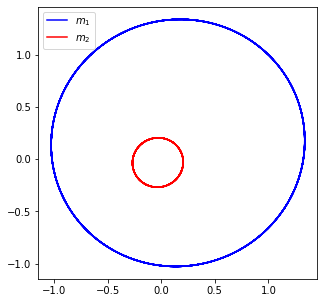

In [185]:
f_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts,f_0)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x1, y1,color = 'blue', label = r'$m_1$')
ax.plot(x2, y2, color = 'red', label = r'$m_2$')
ax.set_label('Gravitational Orbit1')
ax.legend()

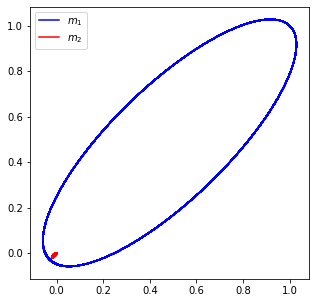

In [188]:
G = 1.
m2 = 50.
m1 = 1.


orbit1 = Cartesian_Orbit(m1,m2,G)
x1_0, x1_dot_0 =1,-1.
y1_0, y1_dot_0 = 1.,1.
x2_0, x2_dot_0 = -(m1/m2) * x1_0,-(m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, -(m1/m2) * y1_dot_0

f_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts,f_0)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x1, y1,color = 'blue', label = r'$m_1$')
ax.plot(x2, y2, color = 'red', label = r'$m_2$')
ax.set_label('Gravitational Orbit1')
ax.legend()

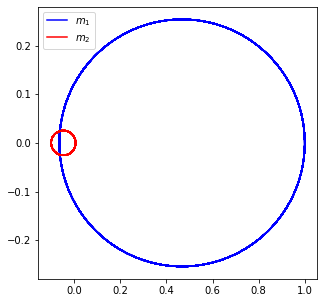

In [192]:
G = 1.
m2 = 10.
m1 = 1.


orbit1 = Cartesian_Orbit(m1,m2,G)
x1_0, x1_dot_0 =1,0.
y1_0, y1_dot_0 = 0.,1.
x2_0, x2_dot_0 = -(m1/m2) * x1_0,-(m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, -(m1/m2) * y1_dot_0

f_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts,f_0)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x1, y1,color = 'blue', label = r'$m_1$')
ax.plot(x2, y2, color = 'red', label = r'$m_2$')
ax.set_label('Gravitational Orbit1')
ax.legend()

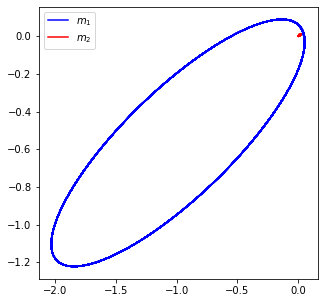

In [197]:
G = 1.
m2 = 100.
m1 = 1.


orbit1 = Cartesian_Orbit(m1,m2,G)
x1_0, x1_dot_0 =-2,-1.
y1_0, y1_dot_0 = -1.,-2
x2_0, x2_dot_0 = -(m1/m2) * x1_0,-(m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, -(m1/m2) * y1_dot_0

f_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts,f_0)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x1, y1,color = 'blue', label = r'$m_1$')
ax.plot(x2, y2, color = 'red', label = r'$m_2$')
ax.set_label('Gravitational Orbit1')
ax.legend()